In [1]:
from sklearn.datasets import load_digits
import numpy, cv2
import matplotlib.pyplot as plt

digits = load_digits()

In [25]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [31]:
digits.images.shape

(1797, 8, 8)

In [2]:
len(digits.images)

1797

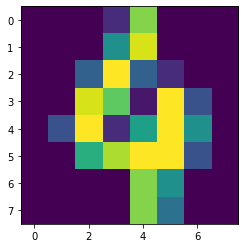

In [38]:
_, ax = plt.subplots()
ax.imshow(digits.images[100])

In [39]:
digits.target[100]

4

# Step1: Use KNN to take a digit and find 50 of its neighbors.

In [4]:
digits.images[0].shape

(8, 8)

In [5]:
digits.images[0].reshape(64).shape

(64,)

In [6]:
digits.target[340]

2

In [7]:
from sklearn.neighbors import NearestNeighbors

X = [x.reshape(64) for x in digits.images]
nbrs = NearestNeighbors(n_neighbors=50).fit(X)

In [8]:
distances, neighbors = nbrs.kneighbors(X)

In [40]:
neighbors.shape

(1797, 50)

In [10]:
neighbors_of_340 = neighbors[340]

In [11]:
len(neighbors_of_340)

50

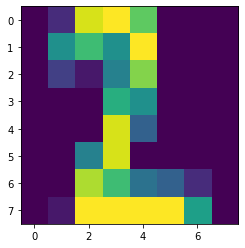

In [43]:
_, ax = plt.subplots()
ax.imshow(digits.images[neighbors_of_340[20]])

# Step 2: Use k-means to clusterize the dataset into 10 clusters.

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [14]:
kmeans.labels_

array([5, 7, 7, ..., 7, 3, 3], dtype=int32)

##  Visualize their centroids.

In [15]:
kmeans.cluster_centers_

array([[ 0.00000000e+00,  1.66533454e-16,  3.07228916e-01,
         7.16265060e+00,  1.19457831e+01,  1.93373494e+00,
         1.50602410e-01,  5.42168675e-02,  2.60208521e-18,
         1.20481928e-02,  3.28313253e+00,  1.37951807e+01,
         8.46385542e+00,  1.53012048e+00,  9.75903614e-01,
         2.77108434e-01,  1.30104261e-18,  6.44578313e-01,
         1.07108434e+01,  1.15602410e+01,  4.33734940e+00,
         5.25903614e+00,  3.87349398e+00,  3.25301205e-01,
         6.02409639e-03,  4.75903614e+00,  1.47590361e+01,
         5.86144578e+00,  6.87951807e+00,  1.07530120e+01,
         6.21686747e+00,  1.80722892e-02,  0.00000000e+00,
         8.92771084e+00,  1.48072289e+01,  9.35542169e+00,
         1.28132530e+01,  1.43915663e+01,  5.48192771e+00,
         0.00000000e+00,  9.63855422e-02,  6.50602410e+00,
         1.16867470e+01,  1.23433735e+01,  1.48373494e+01,
         1.07590361e+01,  1.56626506e+00,  1.38777878e-17,
         6.02409639e-02,  1.11445783e+00,  3.00000000e+0

In [16]:
len(kmeans.cluster_centers_)

10

In [17]:
len(kmeans.cluster_centers_[0])

64

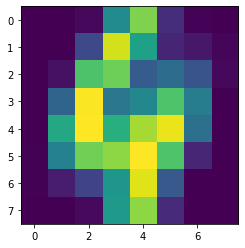

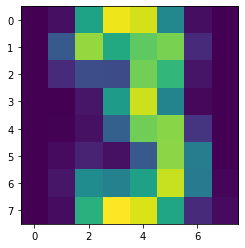

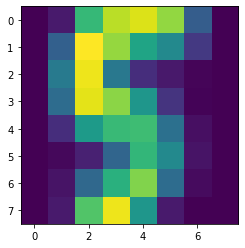

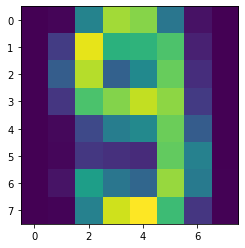

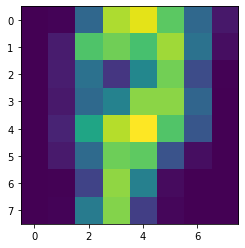

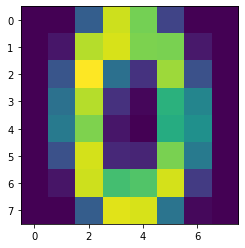

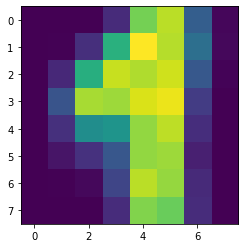

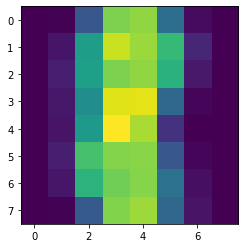

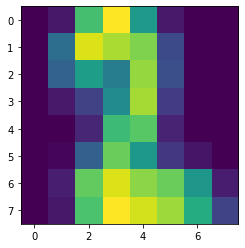

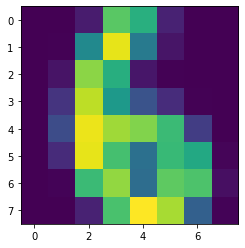

In [18]:
for cluster_center in kmeans.cluster_centers_:
    _, ax = plt.subplots()
    ax.imshow(cluster_center.reshape(8, 8))

# Step3 : Use t-SNE to visualize the clustering.

In [19]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)

/home/ange/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ange/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [20]:
len(X_embedded)

1797

In [21]:
len(X_embedded[0])

2

In [22]:
X_embedded[0]

array([ 21.733324, -57.894   ], dtype=float32)

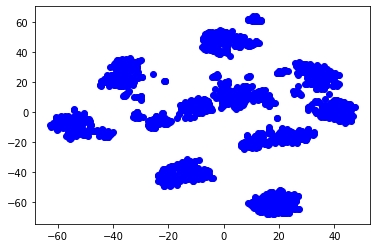

In [23]:
_, ax = plt.subplots()
for point in X_embedded:
    ax.scatter(point[0], point[1], c='blue')

In [24]:
print(list(target_ids))
print(colors)
print(digits.target_names)

NameError: name 'target_ids' is not defined

In [ ]:
X_embedded

In [ ]:
i=1
X_embedded[digits.target == i, 1]

In [ ]:
target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = ['grey', 'g', 'b', 'c', 'm', 'y', 'k', 'cyan', 'orange', 'purple']

for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_embedded[digits.target == i, 0], 
                X_embedded[digits.target == i, 1], 
                c=c, 
                label=label)
plt.legend()
plt.show()